<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695   

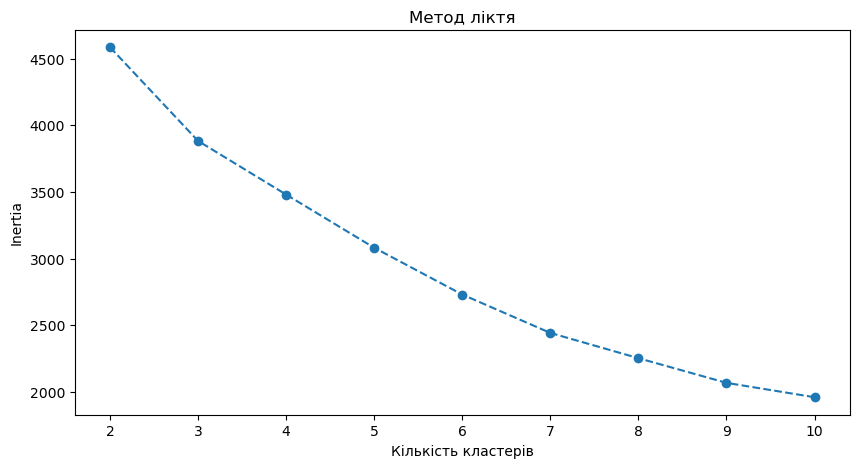

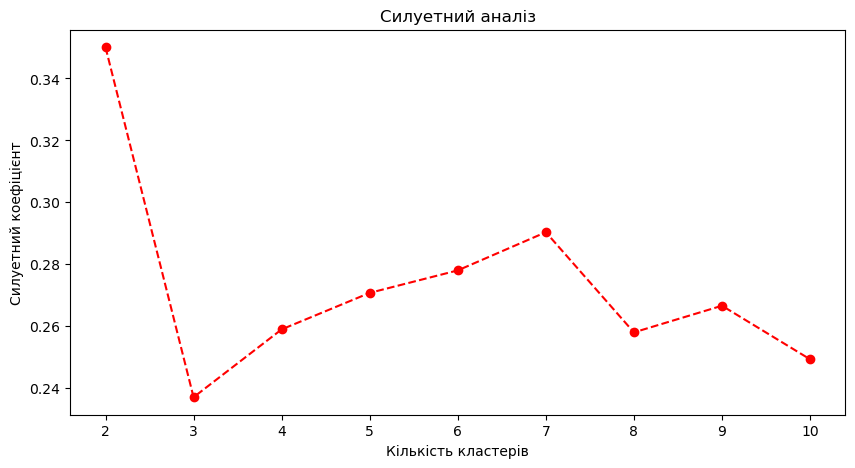

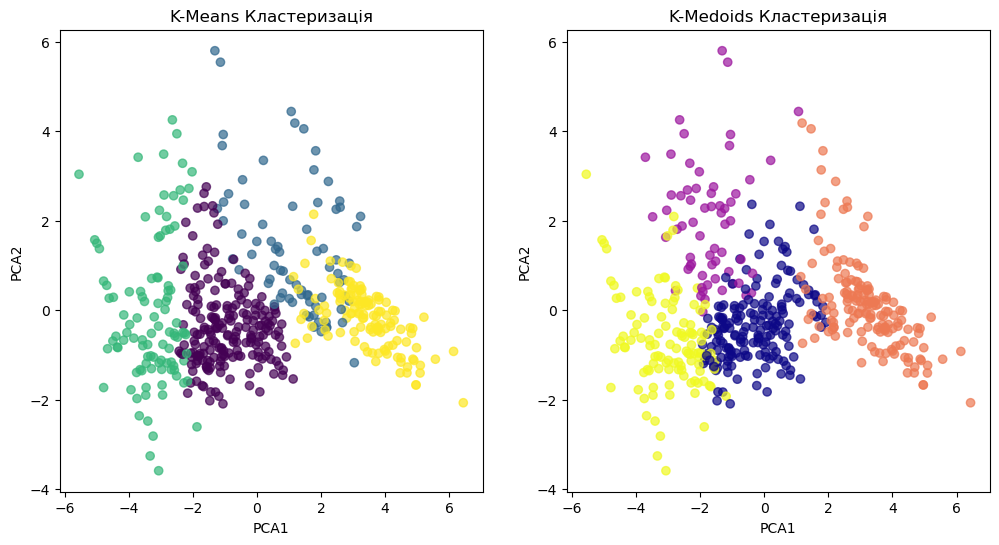

K-Means Silhouette Score: 0.25891944402710804
K-Medoids Silhouette Score: 0.23192915308952702
K-Means Davies-Bouldin Score: 1.6046178606066954
K-Medoids Davies-Bouldin Score: 1.423688297884912


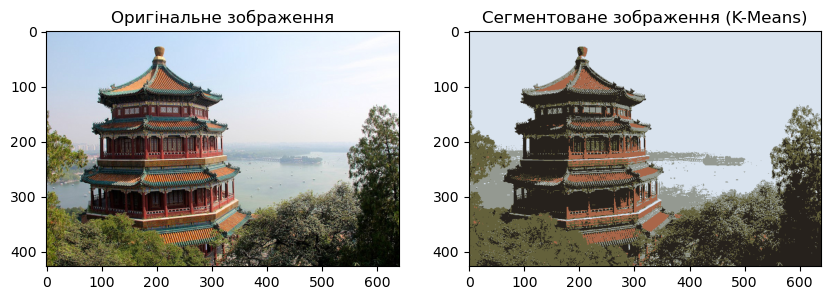

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA
from sklearn.datasets import load_sample_image
from skimage.color import rgb2lab, lab2rgb
from skimage.util import img_as_float

# 1. Завантаження та підготовка даних
df = pd.read_csv("boston.csv")
print(df.info())
print(df.describe())

# Видалення ідентифікаторів, якщо є (наприклад, "ID" або "Unnamed: 0")
df = df.select_dtypes(include=[np.number])  # Використання лише числових стовпців

# Масштабування даних
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# 2. Визначення оптимальної кількості кластерів
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, labels))

# Метод "Elbow"
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')
plt.title('Метод ліктя')
plt.show()

# Метод силуетного аналізу
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--', color='r')
plt.xlabel('Кількість кластерів')
plt.ylabel('Силуетний коефіцієнт')
plt.title('Силуетний аналіз')
plt.show()

# Оптимальне значення кластерів (визначаємо за графіками)
k_optimal = 4  # Можна змінити після аналізу

# 3. Кластеризація K-Means
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(df_scaled)

# Кластеризація K-Medoids
kmedoids = KMedoids(n_clusters=k_optimal, random_state=42, metric='euclidean')
kmedoids_labels = kmedoids.fit_predict(df_scaled)

# 4. Візуалізація кластерів у просторі PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.title('K-Means Кластеризація')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.subplot(1, 2, 2)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmedoids_labels, cmap='plasma', alpha=0.7)
plt.title('K-Medoids Кластеризація')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.show()

# 5. Оцінка якості кластеризації
print("K-Means Silhouette Score:", silhouette_score(df_scaled, kmeans_labels))
print("K-Medoids Silhouette Score:", silhouette_score(df_scaled, kmedoids_labels))
print("K-Means Davies-Bouldin Score:", davies_bouldin_score(df_scaled, kmeans_labels))
print("K-Medoids Davies-Bouldin Score:", davies_bouldin_score(df_scaled, kmedoids_labels))

# 6. Сегментація зображень методом кластеризації
image = load_sample_image("china.jpg")
image = img_as_float(image)

# Конвертація у LAB-простір
image_lab = rgb2lab(image)
image_data = image_lab.reshape(-1, 3)

# Використання K-Means для сегментації
kmeans_img = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_img_labels = kmeans_img.fit_predict(image_data)

# Відновлення зображення
segmented_image = kmeans_img.cluster_centers_[kmeans_img_labels]
segmented_image = segmented_image.reshape(image_lab.shape)
segmented_image = lab2rgb(segmented_image)

# Візуалізація
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Оригінальне зображення')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title('Сегментоване зображення (K-Means)')
plt.show()
